# Example 5.2: Probability distribution of peak response

This example studies the peak responses of a single degree-of-freedom system subjected to a stochastic load.

We assume that the mass is $m = 1 
$ kg, the stiffness is $k=10$ N/m and damping ratio $\xi=0.05$. The one-sided auto-spectral density of the load is defined as:

$$S_X = \frac{1}{10+\omega^2} 
, \quad
0 <\omega<\infty
$$

### Define structural properties

In [19]:
import numpy as np
from matplotlib import pyplot as plt

m =1.0
k =10.0
xi = 0.05
c = 2*xi*np.sqrt(k*m)


### Time domain simulation of response

We start by simulating the time history of the load, and solve the response by Newmarks method to study the peaks and max responses.



Max peak = 0.47


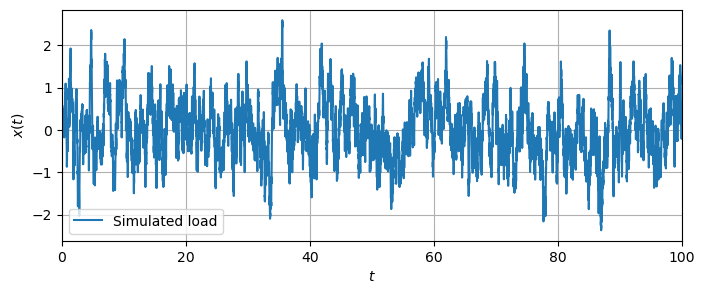

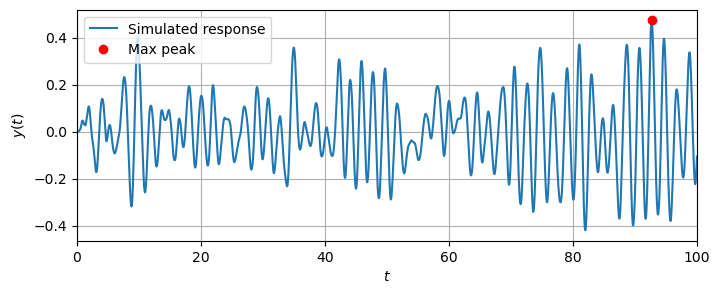

In [23]:
import sys
sys.path.append('./../modules')
from time_integration import * # Import all functions in the module time_integration
from matplotlib import pyplot as plt 

T=100
dt=0.01

N=int(T/dt)

t=np.arange(0,N,1)*dt # Time axis

domega=2*np.pi/T # Frequency spacing
omega_axis = np.arange(0,N,1)*domega # Frequency axis

# Load spectrum
Sx_sim = 1/(10.0+omega_axis**2)
Sx_sim[0]=0

phi = np.random.rand(N)*2*np.pi # Random phase angles 
c_amp = (2*Sx_sim*domega)**0.5*np.exp(1j*phi) # The complex amplitude including the phase angle
x = np.real(np.fft.ifft(c_amp)*N) # The IFFT

# Solve the response by Newmarks method
y, ydot, y2dot = linear_newmark_krenk(m,c,k,x,0,0,dt)

# Find max response
idx_max=np.argmax(y[0,:])

# Plot load
plt.figure(figsize=(8,3))
plt.plot(t,x,label = 'Simulated load')
plt.xlim((0,T))
#plt.xlim((0,100))
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend()

# Plot response
plt.figure(figsize=(8,3))
plt.plot(t,y[0,:],label = 'Simulated response')

plt.plot(t[idx_max],y[0,idx_max], 'ro',label = 'Max peak')
plt.xlim((0,T))
#plt.xlim((0,100))
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend()

print('Max peak = ' + '{:.2f}'.format(y[0,idx_max]))


## Question 1: Calculate the probability density function of the peaks of the response

The probability distribution of all response peaks is obtained by considering the number of peaks that crosses a threshold $a$ divided by the total number of peaks. The up-crossing rate for a Gaussian stochastic process is defined by

$$v_y^+(a) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y}\exp\left[- \frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right] $$

It is thus straightforward to obtain the expected number of peaks being higher than $a$. Getting the total number of peaks is more complicated. A response process for a lightly damped linear system is narrowly banded since the response is dominated by frequency content close to the natural frequency of the dynamic system. An ideal narrow banded response has one peak per zero crossing. We can then approximate the total number of peaks as the number of zero crossings. The mean zero upcrossing rate is defined as 
. 
$$v_y^+(0) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y} $$

The probability of a peak  higher than the threshold $a$ is thus

$$P\{y_p>a\} = \frac{v_y^+(a)}{v_y^+(0)}$$

We are interested in the probability distribution function, which is the probability of the response being less or equal to the threshold. This is the complement to the event above.

$$P\{y_p<a\} = 1- \frac{v_y^+(a)}{v_y^+(0)}$$

Inserting the expressions for the up-crossing rates 

$$P_a(a) = 1- \exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right]$$

We are asked to obtain the probability density function, which is the derivative of the probability distribution.

$$ p_a(a) = \frac{\partial P_a(a)}{\partial a} = \frac{a}{\sigma_y^2} 
\exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2\right]$$

This is the Rayleigh distribution.



### Frequency response function


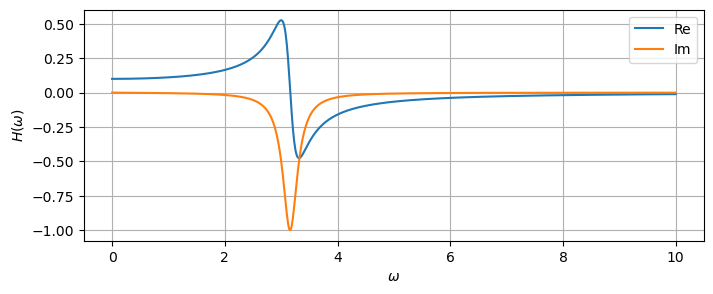

In [14]:
omega = np.linspace(0,10,1001)
H = 1/(-omega**2*m + 1j*omega*c+ k)

plt.figure(figsize=(8,3))
plt.plot(omega,np.real(H),label='Re')
plt.plot(omega,np.imag(H),label='Im')
plt.grid()
plt.ylabel('$H(\omega)$')
plt.xlabel('$\omega$')
plt.legend()

### Load auto-spectral density

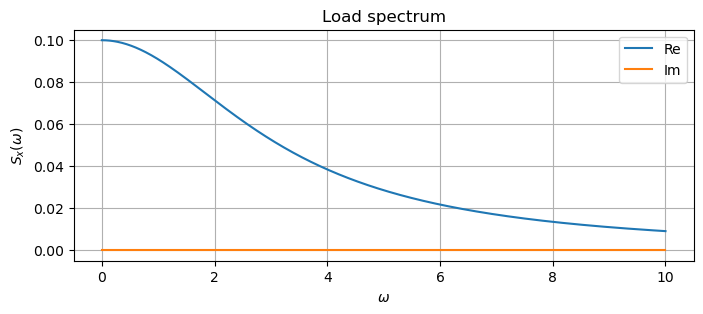

In [15]:
Sx = 1/(10.0+omega**2)

plt.figure(figsize=(8,3))
plt.plot(omega,np.real(Sx),label='Re')
plt.plot(omega,np.imag(Sx),label='Im')
plt.grid()
plt.ylabel('$S_x(\omega)$')
plt.xlabel('$\omega$')
plt.title('Load spectrum')
plt.legend()

### Response auto-spectral density

We find the response as $S_y(\omega)=|H(\omega)|^2 S_x(\omega)$.

Text(0.5, 1.0, 'Response spectrum')

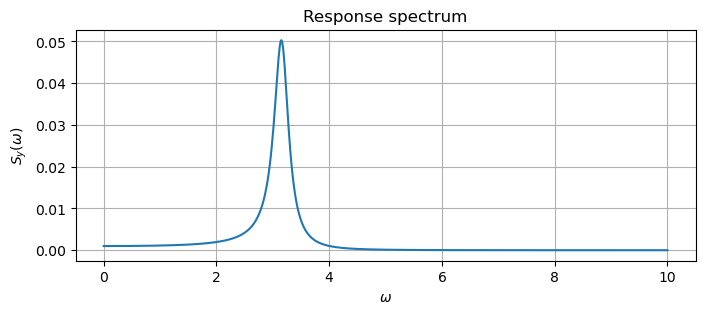

In [16]:
Sy = np.abs(H)**2*Sx

plt.figure(figsize=(8,3))
plt.plot(omega,Sy)
plt.grid()
plt.ylabel('$S_y(\omega)$')
plt.xlabel('$\omega$')
plt.title('Response spectrum')

### Rayleigh distribution of peaks

Text(0.5, 1.0, 'Distribution of peaks (Rayleigh)')

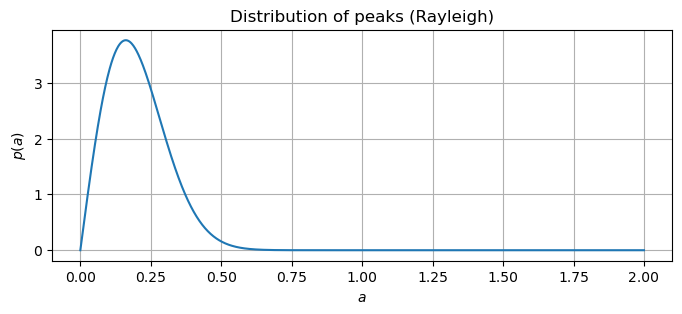

In [17]:
std_y = np.sqrt(np.real(np.trapezoid(Sy,omega)))
a = np.linspace(0,2,1000)
pa = a/std_y**2*np.exp(-0.5*(a/std_y)**2) # Rayleigh PDF

plt.figure(figsize=(8,3))
plt.plot(a,pa)
plt.grid()
plt.ylabel('$p(a)$')
plt.xlabel('$a$')
plt.title('Distribution of peaks (Rayleigh)')

## Question 2: Calculate the probability density function of the largest peak for a time interval of 100 seconds
The probability distribution of the largest peak in an interval of duration $T$ follows a Poisson distribution. 

$$ P_{Ma}(a)=\text{Prob}\{ \max \{ y(t), 0 \le t \le T \} \le a \} = \exp \left[-v_y^+(a)T \right] $$

Here the up-crossing rate is defined by

$$v_y^+(a) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y}\exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right] $$

The probability density function is obtained by taking the derivative of the probability distribution function. 

$$ p_{Ma}(a) = \frac{\partial P_{Ma}(a)}{\partial a} $$

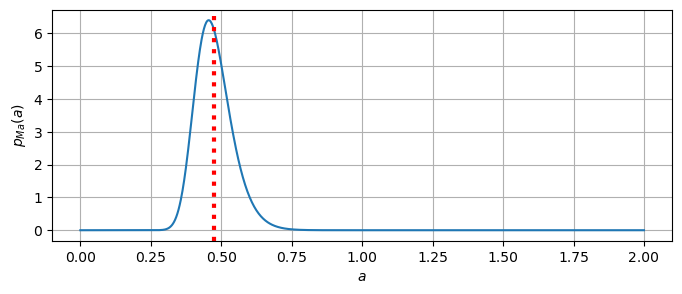

In [24]:
std_doty = np.sqrt(np.real(np.trapezoid(omega**2*Sy,omega)))
am = np.linspace(0,2,1000)
vy = 1/2/np.pi*std_doty/std_y*np.exp(-0.5*(am/std_y)**2)
T = 100.0
Pma = np.exp(-vy*T)
pma = np.zeros(am.shape[0])
pma[0:pma.shape[0]-1] = np.diff(Pma)/(am[1]-am[0])

plt.figure(figsize=(8,3))
plt.plot(am,pma)
plt.grid()
plt.ylabel('$p_{Ma}(a)$')
plt.xlabel('$a$')

a_mean=np.trapezoid(am*pma,am) # Expected value
plt.axvline(a_mean,color='red',linestyle=':',linewidth=3)


The resulting PDF can be quickly compared to the max from a time domain simulation. Remember that the simulation is just one realization and does not give the complete picture.